In [59]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from pymatgen.analysis.diffraction import xrd
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import numpy as np
import matplotlib.pyplot as plt

In [60]:
API_KEY = "qSvDCgTjbfREtdXQwIBl"
material_id = "mp-11869"


def download(material_id, API_KEY, file_name = None) :
    with MPRester(API_KEY) as m:
        # Structure for material id
        structure = m.get_structure_by_material_id(material_id)
    if file_name != None :
        structure.to(filename=file_name)
    return structure


structure = download(material_id, API_KEY)
conventional = SpacegroupAnalyzer(structure).get_conventional_standard_structure()

In [61]:
def get_first_n_peaks(structure, wavelength, n, verbose=False, name=None, show_diffractogram=False):
    """
    Gets the first n peaks of the diffractogram theoretically obtained by exposing a specified material
    to X-ray beams of specified wavelength, and the indices of the corresponding planes.
    
    Parameters :
        - structure : pymatgen.core.structure.Structure
            Structure of analysed material.
        - wavelength : float
            Wavelength of X-ray beams.
        - n : int
            Number of peaks returned.
        - verbose : bool
            Whether or not to print results. Default = False. If set to True, user must specify the name of the analysed crystal lattice.
        - name : string
            Name of the analysed cristal lattice. Default = None.
        - show_diffractogram : bool
            Whether or not to plot the obtained diffractogram. Default = False.
            
    Returns :
        - intensity : numpy array, dtype = float, size = (n,1)
            Scaled intensities of the first n peaks (highest peak set to 100.0).
        - hkl : numpy array, dtype = int, size = (n,3)
            Indices of the planes corresponding to the first n peaks.
    """
    calculator = xrd.XRDCalculator(wavelength)
    pattern = calculator.get_pattern(structure,True)
    intensity = np.empty(n)
    hkl = np.empty((n,3),dtype=int)
    if verbose :
        if n==1 : print("\nCalculating first peak of the theoretical diffractogram of the ",name, " crystal lattice, exposed to X-ray beams with a wavelength of ",str(wavelength)," Å : \n")
        else : print("\nCalculating first "+str(n)+" peaks of the theoretical diffractogram of the "+name+ " crystal lattice, exposed to X-ray beams with a wavelength of "+str(wavelength)+" Å : \n")
    for i in range(n):
        intensity[i] = pattern.y[i]
        hkl[i] = pattern.hkls[i][0]['hkl']
        if verbose :
            print("Peak n°"+str(i+1)+" :   Intensity (scaled) : {:7.3f}".format(intensity[i])+"      Associated plane :",hkl[i])
    if show_diffractogram :
        print("\n")
        fig = plt.figure(figsize = (13,7))
        ax = plt.axes()
        fig.suptitle('Diffractogram', fontsize=16)
        plt.show(calculator.get_plot(structure, ax = ax))
    return intensity, hkl



Calculating first 3 peaks of the theoretical diffractogram of the HfSnPd crystal lattice, exposed to X-ray beams with a wavelength of 1.5406 Å : 

Peak n°1 :   Intensity (scaled) :  22.577      Associated plane : [1 1 1]
Peak n°2 :   Intensity (scaled) :  27.549      Associated plane : [2 0 0]
Peak n°3 :   Intensity (scaled) : 100.000      Associated plane : [2 2 0]




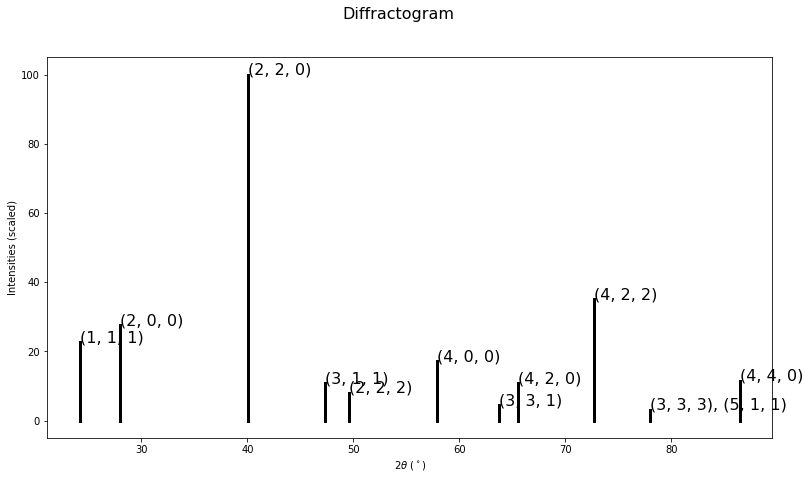

In [62]:
intensity, hkl_indices = get_first_n_peaks(conventional, 1.54060, 3, verbose=True, name = "HfSnPd", show_diffractogram=True)